In [48]:
!pip install missingno

In [49]:
!pip install lightgbm

In [50]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

# Set max columns
pd.set_option('display.max_columns', None)

# Warning
import warnings
warnings.filterwarnings('ignore')

# E-commerce Customer Churn: Predicting Customer Churn
### Created By: Christianto Kurniawan Priyono

## Business Understanding

**Context**

E-commerce customer churn, atau bisa disebut sebagai kehilangan pelanggan dalam bisnis e-commerce, merupakan sebuah fenomena dimana seorang pelangan menghentikan interaksinya dengan sebuah situs atau toko online setelah melakukan transaksi atau melakukan interaksi yang tidak diinginkan dengan situs tersebut. Fenomena ini merupakan masalah yang serius bagi banyak perusahaan e-commerce karena dapat mengurangi pendapatan dan keuntungan mereka. 

Oleh karena itu, sebuah perusahaan e-commerce ingin mengetahui pelanggan yang ingin melakukan pemberhentian (churn) dan mengurangi jumlah pelanggan yang churn. Dilakukan sebuah model prediksi yang tepat untuk menentukan pelanggan yang berhenti berlangganan (churn) atau tidak menggunakan machine learning. Dengan target yang ditentukan sebagai berikut:

- 0 : Customer tidak churn
- 1 : Customer churn

**Problem Statement**

Churn pelanggan dalam bisnis e-commerce merupakan masalah serius yang signifikan dalam jangka panjang, karena dapat berdampak negatif terhadap pertumbuhan dan profitabilitas bisnis. Menurut sumber yang dikutip, biaya yang dikeluarkan untuk mencari customer baru berkisar antara 45 - 50 USD, sedangkan biaya untuk mempertahankan customer sebesar 20 USD. Oleh karena itu, perusahaan e-commerce perlu memahami akar penyebab churn dan mengambil tindakan yang tepat untuk mencegahnya. Dengan demikian, permasalahan yang perlu dipecahkan adalah bagaimana mengurangi churn pelanggan secara efektif dalam bisnis e-commerce dan menjaga retensi pelanggan agar terjamin pertumbuhan dan profitabilitas jangka panjang.



**Goals**

Dalam rangka mengatasi permasalahan churn pelanggan. Perusahaan memiliki beberapa tujuan, yaitu meningkatkan kepuasan pelanggan, mengurangi penyebab churn, meningkatkan loyalitas pelanggan, meningkatkan retensi pelanggan, dan meningkatkan pertumbuhan bisnis jangka panjang

**Analytics Approach**

Jadi yang akan dilakukan adalah menganalisis faktor pembeda dari pelanggan yang mekalukan *Churn* atau tidak. Selanjutnya akan dibuat model klasifikasi yang akan membantu perusahaan untuk mempertahankan customer yang akan churn

**Metric Evaluation**

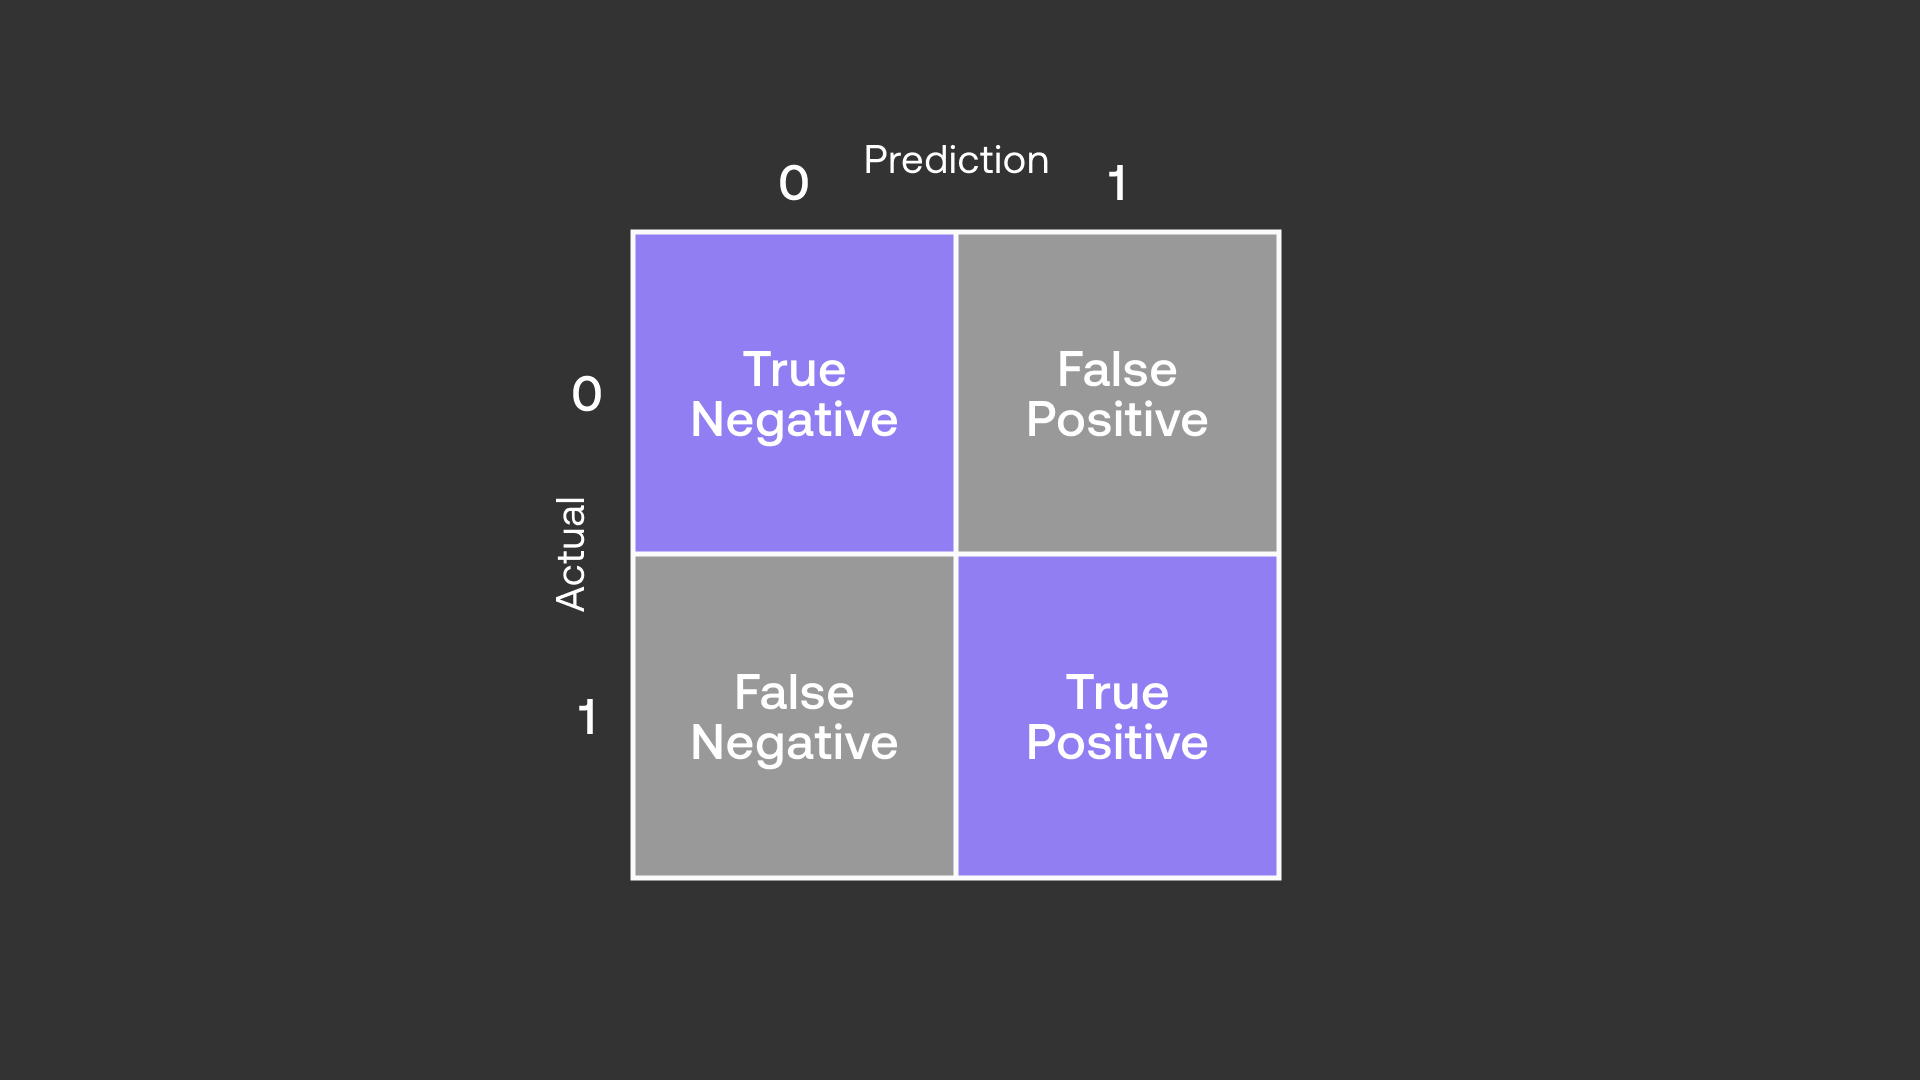

False Positive (FP) : pelanggan dianggap sudah churn padahal tidak, Konsekuensinya: perusahaan akan kehilangan pelanggan yang masih aktif

Flase Negative (FN) : pelanggan dianggap tidak churn padahal churn, Konsekuensinya: perusahaan akan kehilangan pelanggan yang sebenarnya sudah churn

Berdasarkan konsekuensi tersebut akan dibuat model yang akan mengoptimalkan biaya promosi yang hanya di tujukan ke customer yang memiliki kecenderungan untuk churn dan memutuskan untuk tidak churn. Sehingga, metrics yang cocok digunakan pada model ini adalah **ROC_AUC**

## Data Understanding

Dataset : *data_ecommerce_customer_churn.csv* (didapatkan dari drive yang dishare oleh pengajar).

### Attribute Information

| Attribute | Data Type | Description |
| --- | --- | --- |
| Tenure | Float | Tenure of a customer in the company |
| WarehouseToHome | Float | Distance between the warehouse to the customer’s home |
| NumberOfDeviceRegistered | Int | Total number of deceives is registered on a particular customer |
| PreferedOrderCat | Object | Preferred order category of a customer in the last month |
| SatisfactionScore | Int | Satisfactory score of a customer on service |
| MaritalStatus | Object | Marital status of a customer |
| NumberOfAddress | Int | Total number of added on a particular customer |
| Complain | Int | Any complaint has been raised in the last month |
| DaySinceLastOrder | Float | Day since last order by customer |
| CashbackAmount | Float | Average cashback in last month |
| Churn | Int | Churn flag |

In [51]:
# Load Dataset
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [52]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


**Informasi Data**<br>
Terdapat 3941 baris dan 11 kolom yang memberikan informasi mengenai pelanggan e-commerce ini.

**Kolom Prediksi (Target)**<br>
  * **Churn** : Berisi data pelanggan churn atau tidak

**Kolom Categorical**<br>
  * **PreferedOrderCat**: Preferred order category of customer in last month
  * **MaritalStatus**: Marital status of customer

**Kolom Numerical**<br>
  * **Tenure**: Tenure of a customer in the company
  * **WarehouseToHome**: Distance in between warehouse to home of customer
  * **NumberOfDeviceRegistered**: Total number of deceives is registered on particular customer 
  * **SatisfactionScore**: Satisfactory score of customer on service
  * **NumberOfAddress**: Total number of added added on particular customer
  * **Complain**: Any complaint has been raised in last month
  * **DaySinceLastOrder**: Day Since last order by customer
  * **CashbackAmount**: 	Average cashback in last month

## Data Cleaning

Terdapat data yang kosong dibeberapa fitur/kolom, maka kita akan memperbaiki semua datanya dan membuat menjadi siap pakai untuk melakukan analisa terhadap masalah dan pembuatan model machine learning

In [53]:
# Function to check columns, datatype, missing value, and unique value
def unik (x):
    Type=[]
    Count=[]
    Sample=[]
    MissVal=[]
    for i in x.columns:
        Sample.append(x[i].unique()[:50])
        Count.append(x[i].nunique())
        Type.append(x[i].dtype)
        MissVal.append(x[i].isna().sum())
    unik=pd.DataFrame({
        'Columns':df.columns,
        'Dtype':Type,
        'Nunique':Count,
        'Missing Value':MissVal,
        'Unique':Sample
    })
    return unik

In [54]:
unik(df)

,Columns,Dtype,Nunique,Missing Value,Unique
0,Tenure,float64,36,194,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,33,169,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,6,0,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,6,0,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,5,0,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,3,0,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,14,0,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,2,0,"[0, 1]"
8,DaySinceLastOrder,float64,22,213,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,2335,0,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Dari data diatas, kita mempunyai 194 missing value pada kolom Tenure, 169 missing value pada kolom WarehouseToHome, dan 213 missing value pada kolom DaySinceLastOrder.

Kemudian kita check unique values dari kolom PreferedOrderCat, jika mempunyai value yang sama maka akan kita sederhanakan.

In [55]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others',
       'Mobile Phone', 'Grocery'], dtype=object)

terdapat value yang sama antara Mobile Phone dengan Phone, maka akan kita jadikan satu menjadi Mobile Phone

In [56]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Fashion', 'Others',
       'Grocery'], dtype=object)

### Boxplot Missing

<Axes: >

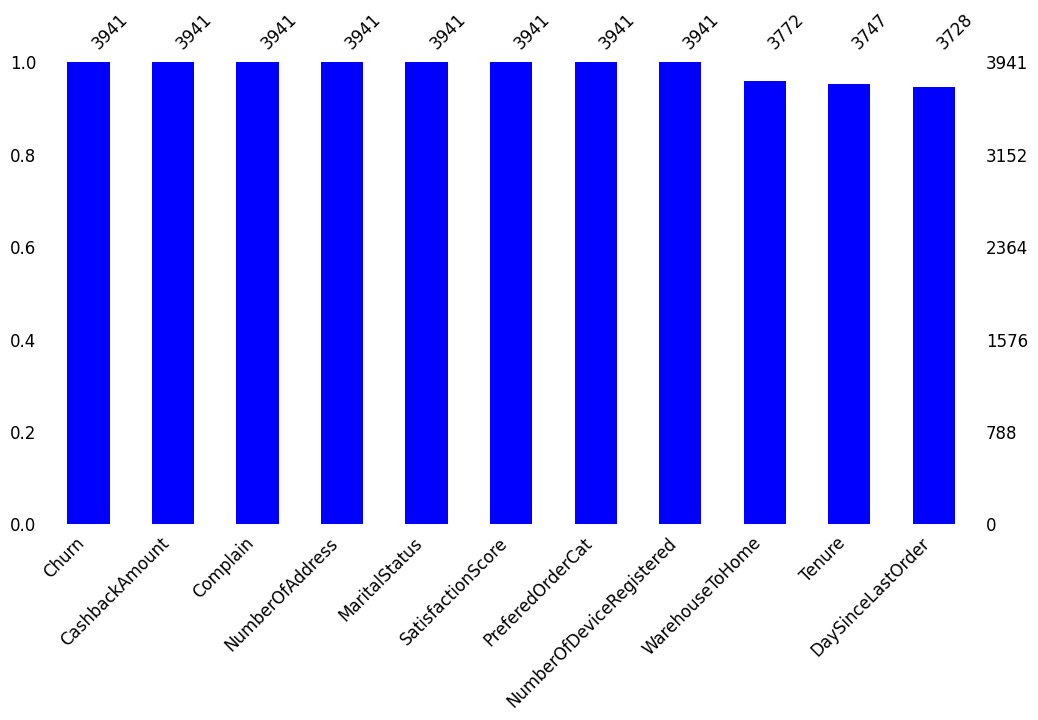

In [57]:
missingno.bar(df, sort="descending", figsize=(12,6), fontsize=12, color='blue')

Dari visualisasi diatas, terdapat **missing values** pada feature WarehouseToHome, Tenure, DaySinceLastOrder.

### Heatmap Data Correlation

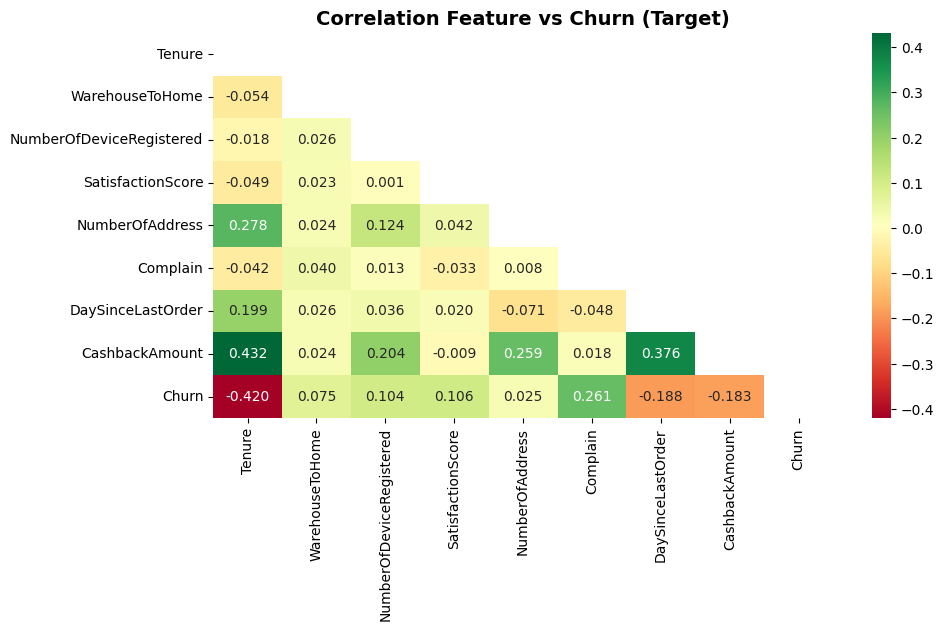

In [58]:
corr = df.corr('spearman') # menggunakan spearman karena tidak check distribusi normal atau tidak.
plt.figure(figsize=(10,5))
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='.3f', mask=matrix, cmap='RdYlGn')
plt.title('Correlation Feature vs Churn (Target)', size=14, weight='bold');

Dari visualisasi heatmap untuk melihat korelasi antara feature dengan target, mendapatkan informasi sebagai berikut:


*   Feature **Tenure** memiliki korelasi negatif terbesar yaitu -0.42
*   Feature **Complain** memiliki korelasi positif terbesar yaitu 0.261
*   Feature lainnya memiliki nilai korelasi yang rendah yaitu dibawah 0.2 baik korelasi negatif atau korelasi positif

### Drop Data Duplikat

In [59]:
df.duplicated().sum()

672

Terdapat data yang duplicate pada dataset sebanyak 672 data, dan kita akan menghapus data duplicate tersebut. Data duplicate ini dihapus dengan tujuan untuk mendapatkan performa Machine Learning yang terbaik.

In [60]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3110 non-null   float64
 1   WarehouseToHome           3134 non-null   float64
 2   NumberOfDeviceRegistered  3269 non-null   int64  
 3   PreferedOrderCat          3269 non-null   object 
 4   SatisfactionScore         3269 non-null   int64  
 5   MaritalStatus             3269 non-null   object 
 6   NumberOfAddress           3269 non-null   int64  
 7   Complain                  3269 non-null   int64  
 8   DaySinceLastOrder         3088 non-null   float64
 9   CashbackAmount            3269 non-null   float64
 10  Churn                     3269 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 306.5+ KB


### Remove Missing Value

In [61]:
df.isna().sum()

Tenure                      159
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

Terdapat 3 feature yang memiliki missing value yaitu: 
- Tenure,
- WarehouseToHome,
- DaySinceLastOrder

Selanjutnya, pengisian missing values menggunakan metode **SimpleImputer(Median)**

In [62]:
# Isi missing value Tenure, WarehouseToHome, dan PreferredOrderCat dengan SimpleImputer strategy median
missing_kolom = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

for i in missing_kolom:
    impute = SimpleImputer(strategy='median')
    df[i] = impute.fit_transform(df[i].values.reshape(-1,1))

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3269 non-null   float64
 1   WarehouseToHome           3269 non-null   float64
 2   NumberOfDeviceRegistered  3269 non-null   int64  
 3   PreferedOrderCat          3269 non-null   object 
 4   SatisfactionScore         3269 non-null   int64  
 5   MaritalStatus             3269 non-null   object 
 6   NumberOfAddress           3269 non-null   int64  
 7   Complain                  3269 non-null   int64  
 8   DaySinceLastOrder         3269 non-null   float64
 9   CashbackAmount            3269 non-null   float64
 10  Churn                     3269 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 306.5+ KB


## Data Analysis

### Categorical Features

In [64]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
cat_features

['PreferedOrderCat', 'MaritalStatus']

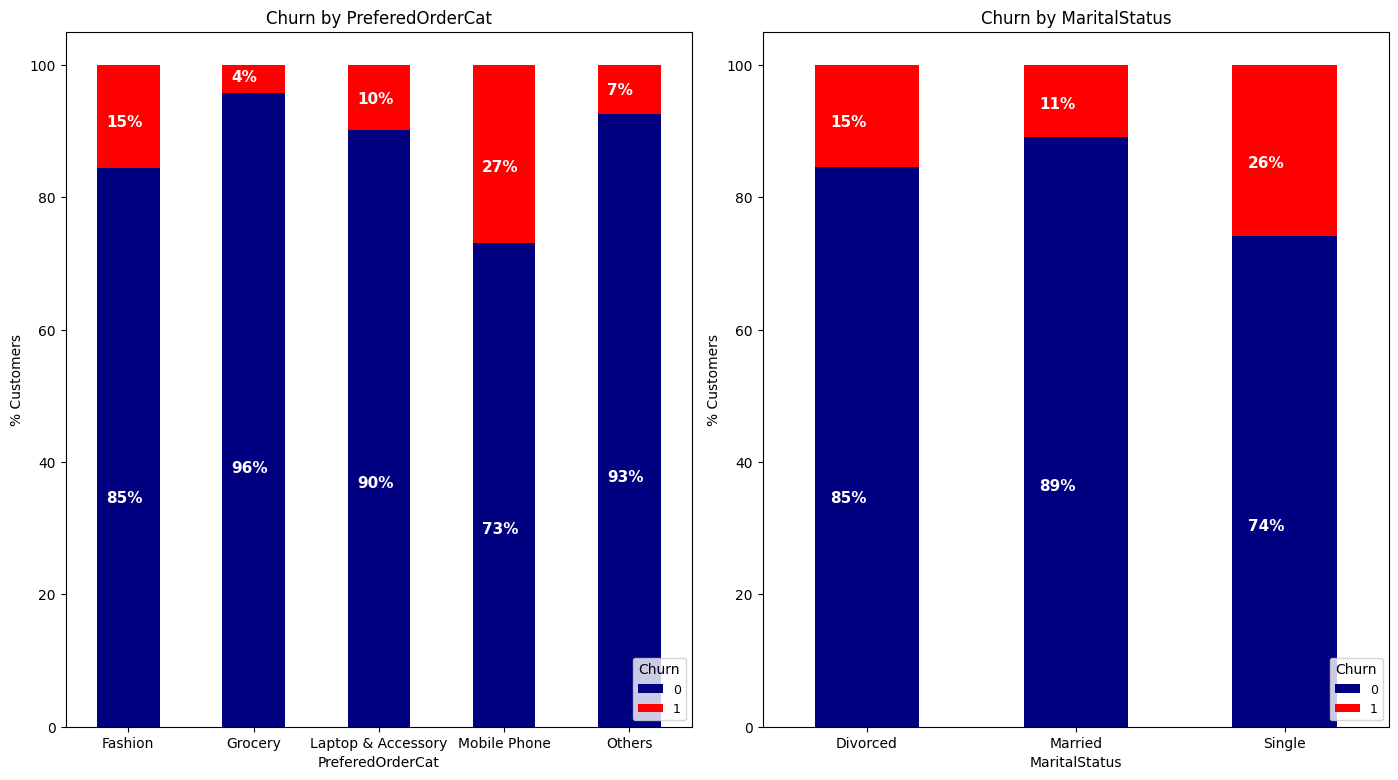

In [65]:
plt.figure(figsize=(35, 15), facecolor='white')
plotnumber = 1

for feature in cat_features[:]:

        column1 = feature

        # membuat table berdasarkan 2 kolom kategorikal
        groupby_table = df.groupby([column1,'Churn']).size().unstack()

        # fungsi untuk pelabelan dimana jika nilainya 0 tidak akan ditampilkan
        def show() :
            if height > 0 :
                return '{:.0f}%'.format(height)
            else :
                return '' 
        
        # subplot (letak grafik)
        ax = plt.subplot(2, 5, plotnumber)
        
        # Value berdasarkan feature 
        (groupby_table.T*100.0 / groupby_table.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0, 
                                                                ax = ax,
                                                                color = ['navy', 'red'])

        ax.legend(loc = 'lower right', prop={'size':9},title = 'Churn')
        ax.set_ylabel('% Customers')
        ax.set_title(f'Churn by {column1}',size = 12)

        # menambahkan label data pada stacked bar chart
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate(show(), (p.get_x()+0.15*width, p.get_y()+.4*height),
                        color = 'white',
                        weight = 'bold',
                        size = 11)
                
        plt.tight_layout();
        
        plotnumber += 1
        

Berdasarkan barplot diatas, dapat disimpulkan bahwa: 
1. Pada feature **PreferedOrderCat**, para pelanggan cenderung melakukan churn pada transaksi category Mobile Phone dengan proporsi 27%, kemudian category Fashion sebesar 15%, dan Laptop & Accesory sebesar 10%
2. Pada feature **Marital Status**, para pelanggan single cenderung melakukan churn dengan persentase 26% dibandingkan pelanggan divorced dan married.

### Numerical Features

In [66]:
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O' and feature not in ['Churn']]
num_features

['Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount']

In [67]:
from scipy.stats import normaltest

,column,skewness,pvalue score
0,Tenure,0.850208,1.062059e-71
1,WarehouseToHome,1.587320,3.251702e-279
2,NumberOfDeviceRegistered,-0.405984,9.956982e-26
3,SatisfactionScore,-0.085780,0.000000e+00
4,NumberOfAddress,1.115238,1.600104e-117
5,CashbackAmount,1.088157,3.747705e-109
6,DaySinceLastOrder,1.517031,4.538905e-253


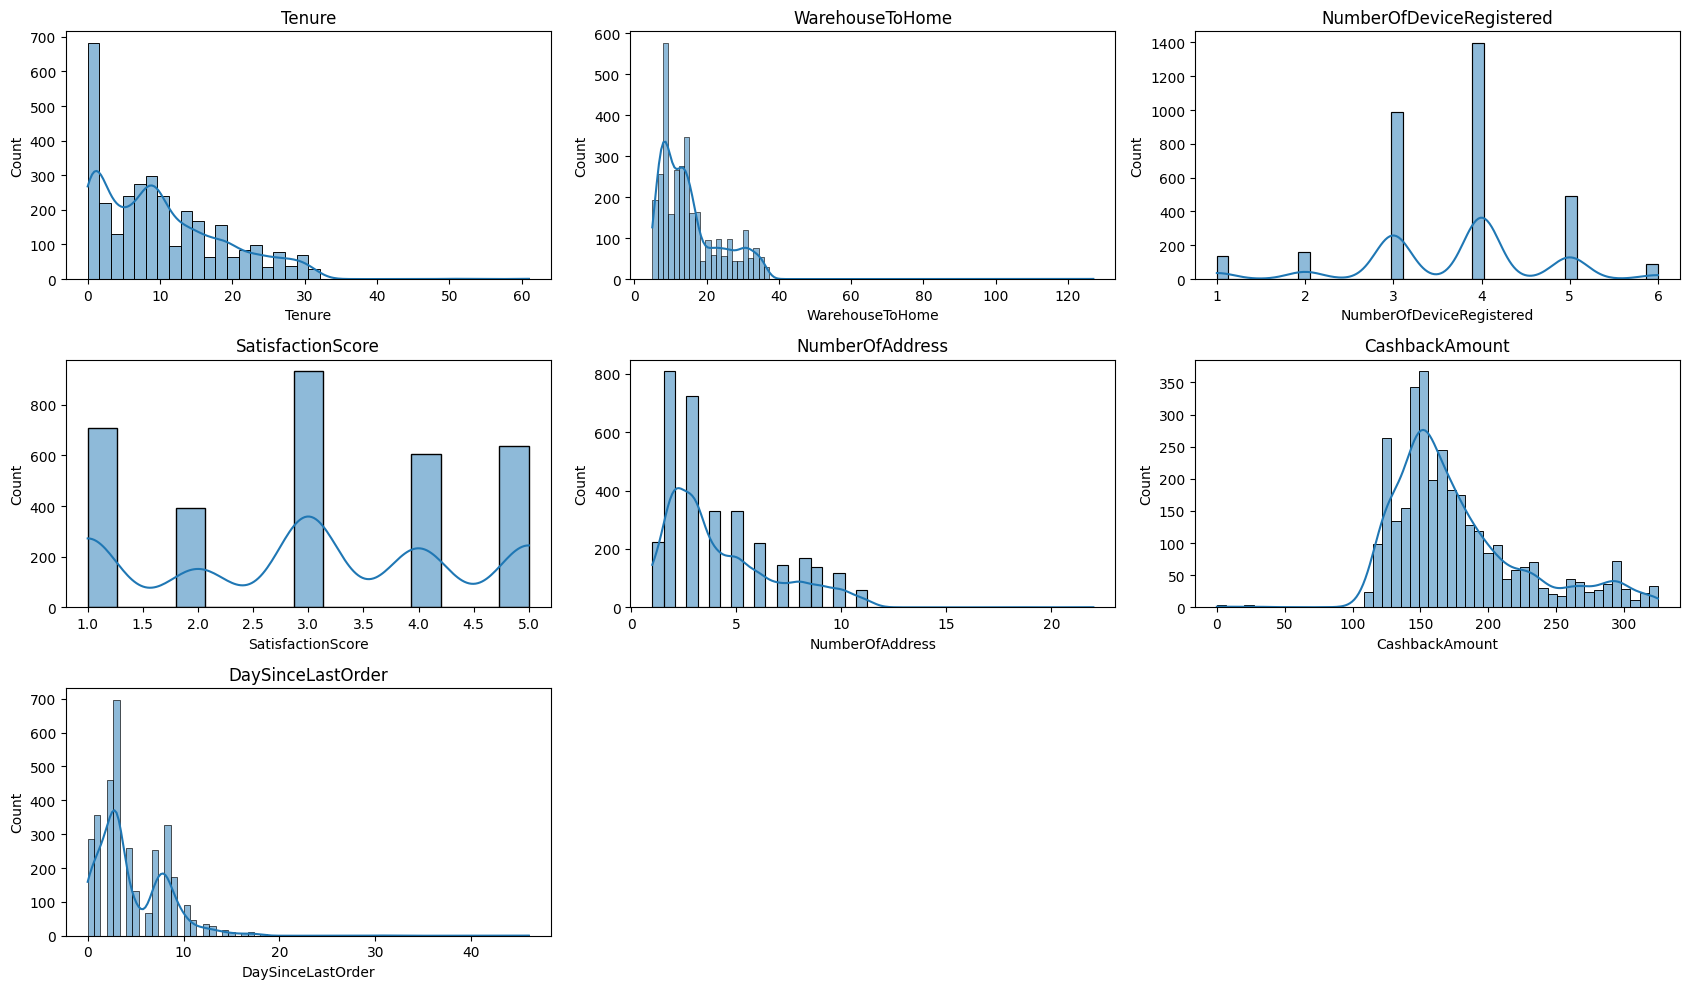

In [68]:
continuous_viz = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount', 'DaySinceLastOrder']
fig = plt.figure(figsize=(17,10))
subplot = 1

for cont in continuous_viz:
    plt.subplot(3,3,subplot)
    sns.histplot(data=df, x=cont, kde=True)
    plt.title(cont)
    plt.tight_layout()
    subplot+=1

pvalue_cont = []
skew_cont = []

for cont in continuous_viz:
    if df[cont].isna().any() == True:
        s, pval = normaltest(df[cont].dropna())
        pvalue_cont.append(pval)
    else:
        s, pvalue = normaltest(df[cont].dropna())
        pvalue_cont.append(pvalue)
    skew_cont.append(df[cont].skew())

pvalue_cont = pd.DataFrame({'column': continuous_viz, 'skewness': skew_cont, 'pvalue score': pvalue_cont})
pvalue_cont

Dari visualisasi diatas, dapat disimpulkan bahwa:
1. Pada Kolom numerical yang bersifat kontinyu rata-rata datanya bersifat right skew (skewness > 0). Dan terdapat juga data yang bersifat normal (no skew) pada kolom `SatisfactionScore` dan `NumberOfDeviceRegistered`
2. Pada Kolom `Tenure` didapatkan bahwa pelanggan melakukan transaksi selama 2 bulan awal dan selanjutnya cenderung fluktuatif
3. Pada Kolom `WarehouseToHome` jarak terdekat dari warehouse ke rumah pelanggan adalah 5km dan jarak terjauh pada 127km
4. Pada Kolom `NumberOfDeviceRegistered` maksimal device yang digunakan pelanggan sebanyak 6
5. Pada kolom `SatisfactionScore` pelanggan paling banyak memberikan review pada bintang 3
6. `NumberOfAddress` Jumlah alamat yang ditambahkan pada pelanggan tertentu paling banyak diangka 2
7. Pada kolom `CashbackAmount` didapatkan bahwa rata-rata pelanggan mendapatkan cashback sebesar 179.77$ berdasarkan data transaksi
8. Pada kolom `DaySinceLastOrder` didapatkan bahwa pelanggan banyak melakukan transaksi selama 46 hari setelah transaksi terakhir

## Data Preparation

### Data Splitting

Sebelum kita melakukan splitting, yang kita lakukan adalah melakukan encoding menggunakan onehot untuk kolom `PreferedOrderCat` dan `MaritalStatus`. 

In [69]:
encoding_kolom = ['PreferedOrderCat', 'MaritalStatus']
misval_kolom = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

onehot = OneHotEncoder(drop='first')
Imputer = SimpleImputer(missing_values = np.nan, strategy ='median')

preprocessor = ColumnTransformer([
    ('misval', Imputer, misval_kolom),
    ('encode', onehot, encoding_kolom),], remainder='passthrough')

x = df.drop(columns=['Churn'])
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

## Modeling

In [70]:
logreg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
xgb = XGBClassifier(verbosity=0, silent=True)
rf = RandomForestClassifier()

model = [logreg, dec_tree, knn, xgb, rf]
algo = ['Logistic Regression', 'Decision Tree', 'KNN', 'XGBoost', 'RF']

### A. Model Benchmarking: K-Fold

In [71]:
score = []
average = []
std_dev = []

for a in model:
    sk_fold = StratifiedKFold(n_splits=5)
    pipeline_model = Pipeline([('preprocess', preprocessor),('model', a)])
    
    model_cv = cross_val_score(pipeline_model, x_train, y_train,
                               cv=sk_fold, scoring='roc_auc')
    
    score.append([round(i, 2) for i in model_cv])
    average.append(model_cv.mean())
    std_dev.append(model_cv.std())
    
# df_default_train = 
pd.DataFrame(data={'Model': algo,
                   'Mean ROC AUC': average,
                   'Std ROC AUC': std_dev}).set_index('Model').sort_values(by='Mean ROC AUC',ascending=False)

,Mean ROC AUC,Std ROC AUC
Model,,
XGBoost,0.934015,0.010324
RF,0.930646,0.014606
Logistic Regression,0.866187,0.019165
KNN,0.776463,0.008752
Decision Tree,0.766110,0.009843


Berdasarkan table diatas, dapat diketahui bahwa terdapat 2 metode yang memberikan nilai ROC AUC tertinggi antara lain: 
1. Random Forest Classifier
2. XGBoost Classifier

Dengan nilai mean ROC AUC diatas 90%

### B. Model Benchmarking: Data Testing

In [72]:
roc_auc = []
recall = []
confus_matrix = []

for i, a in enumerate(model):    
    pipeline_model = Pipeline([('preprocess', preprocessor),('model', a)])
    
    pipeline_model.fit(x_train, y_train)
    
    y_pred = pipeline_model.predict(x_test)
    y_pred_proba = pipeline_model.predict_proba(x_test)[:,1]
    confmat_var = confusion_matrix(y_test, y_pred)
    
    roc_auc.append(roc_auc_score(y_test, y_pred_proba))
    recall.append(recall_score(y_test, y_pred))
    confus_matrix.append(confmat_var)
    print(a,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame(data={'Model': algo,
                   'ROC AUC Score': roc_auc,
                   'Recall Score': recall
                   }).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)

LogisticRegression() 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       547
           1       0.75      0.53      0.62       107

    accuracy                           0.89       654
   macro avg       0.83      0.75      0.78       654
weighted avg       0.89      0.89      0.89       654

DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       547
           1       0.59      0.64      0.61       107

    accuracy                           0.87       654
   macro avg       0.76      0.77      0.77       654
weighted avg       0.87      0.87      0.87       654

KNeighborsClassifier() 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       547
           1       0.56      0.37      0.45       107

    accuracy                           0.85       654
   macro avg       0.72      0.66      0.68       654

,ROC AUC Score,Recall Score
Model,,
XGBoost,0.961745,0.785047
RF,0.957209,0.663551
Logistic Regression,0.917870,0.532710
KNN,0.814972,0.373832
Decision Tree,0.774795,0.635514


Berdasarkan table diatas, `XGBoost` merupakan metode yang paling baik nilai ROC_AUC nya. Selanjutnya akan dilakukan analisa oversampling test untuk metode tersebut.

### C. Oversampling Test

In [73]:
print(f'Ukuran dataset: {df.shape}')
display(df['Churn'].value_counts())
display((df['Churn'].value_counts()/df.shape[0])*100)

Ukuran dataset: (3269, 11)


0    2736
1     533
Name: Churn, dtype: int64

0    83.69532
1    16.30468
Name: Churn, dtype: float64

Berdasarkan analisa sebelumnya, dimana dataset (Churn) memiliki profil yang imbalance, dengan nilai 0 (Tidak Churn) memiliki nilai yang lebih banyak (83,7%) dibandingkan nilai 1 (churn) sebanyak (16,3%). Dari data tersebut maka dipilih metode oversampling. **Metode Oversampling** merupakan metode yang digunakan untuk membangkitkan sejumlah data baru dengan cara menduplikasi dan membuat data tiruan yang serupa dengan kelas minoritas sehingga distribusinya lebih berimbang. Pada metode ini, digunakan teknik SMOTE (Synthetic Minority Oversampling Technique).

Selanjutnya akan dilakukan pemisah dataset menjadi data training set dan test set dan akan dilakukan Oversampling test pada masing-masing set.

In [74]:
x_no_misval = df.drop(columns=['Churn'])
y_no_misval = df['Churn']

x_sampling, x_test_sampling, y_sampling, y_test_sampling = train_test_split(x_no_misval,
                                                                        y_no_misval, 
                                                                        stratify=y_no_misval,
                                                                        test_size=0.2,
                                                                        random_state=42)

In [75]:
# training
score = []
score_avg = []
std = []

sampling = SMOTENC(categorical_features=[3, 5], random_state=42)

x_train_sampling, y_train_sampling = sampling.fit_resample(x_sampling, y_sampling)

# Training w/ balanced dataset
for a in model:
    sk_fold = StratifiedKFold(n_splits=5)
    pipeline_model = Pipeline([('preprocess', preprocessor),('model', a)])

    model_cv=cross_val_score(pipeline_model, 
                              x_train_sampling,
                              y_train_sampling,
                              cv=sk_fold,
                              scoring='roc_auc')

    score.append([round(i, 2) for i in model_cv])
    score_avg.append(model_cv.mean())
    std.append(model_cv.std())

print(f'Ukuran data training: {y_train_sampling.shape}')
display(y_train_sampling.value_counts())
display((y_train_sampling.value_counts()/y_train_sampling.shape[0])*100)
pd.DataFrame(data={'Model': algo,
                   'Mean ROC AUC': score_avg,
                   'Std ROC AUC': std,}).set_index('Model').sort_values(by='Mean ROC AUC',ascending=False)

Ukuran data training: (4378,)


0    2189
1    2189
Name: Churn, dtype: int64

0    50.0
1    50.0
Name: Churn, dtype: float64

,Mean ROC AUC,Std ROC AUC
Model,,
XGBoost,0.984695,0.014704
RF,0.974509,0.015703
KNN,0.939957,0.001717
Decision Tree,0.877574,0.035391
Logistic Regression,0.849138,0.007648


In [76]:
# testing
recall = []
roc_auc_test = []
confus_matrix_test = []

# Testing
for i, a in enumerate(model):
    pipeline_model = Pipeline([('preprocess', preprocessor),('model', a)])

    pipeline_model.fit(x_train_sampling, y_train_sampling)

    y_pred = pipeline_model.predict(x_test_sampling)
    y_pred_proba = pipeline_model.predict_proba(x_test_sampling)[:,1]
    confus_matrix_var = confusion_matrix(y_test_sampling, y_pred)

    recall.append(recall_score(y_test_sampling, y_pred))
    roc_auc_test.append(roc_auc_score(y_test_sampling, y_pred_proba))
    confus_matrix_test.append(confus_matrix_var)
    print(a,'\n', classification_report(y_test,y_pred))

print(f'Ukuran data testing: {y_test_sampling.shape}')
display(y_test_sampling.value_counts())
display((y_test_sampling.value_counts()/y_test_sampling.shape[0])*100)

pd.DataFrame(data={'Model': algo,
                   'ROC AUC Score': roc_auc_test,
                   'Recall Score': recall
                   }).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)

LogisticRegression() 
               precision    recall  f1-score   support

           0       0.97      0.73      0.83       547
           1       0.39      0.87      0.54       107

    accuracy                           0.76       654
   macro avg       0.68      0.80      0.69       654
weighted avg       0.87      0.76      0.79       654

DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       547
           1       0.51      0.63      0.56       107

    accuracy                           0.84       654
   macro avg       0.72      0.75      0.73       654
weighted avg       0.86      0.84      0.85       654

KNeighborsClassifier() 
               precision    recall  f1-score   support

           0       0.94      0.73      0.82       547
           1       0.36      0.76      0.49       107

    accuracy                           0.74       654
   macro avg       0.65      0.75      0.66       654

0    547
1    107
Name: Churn, dtype: int64

0    83.639144
1    16.360856
Name: Churn, dtype: float64

,ROC AUC Score,Recall Score
Model,,
XGBoost,0.945087,0.757009
RF,0.942003,0.813084
Logistic Regression,0.871961,0.869159
KNN,0.825198,0.757009
Decision Tree,0.753669,0.626168


Metode terbaik saat pengujian training set dan test set adalah `XGBoost`, Kemudian akan dilakukan analisa hyperparameter tuning.

### D. Hyperparameter Tuning

Pada hyperparameter tuning, teknik **GridSearchCV**. Teknik ini digunakan untuk mencari nilai parameter yang optiman dari dataset yang diberikan dalam bentuk grid. Cara kerja teknik ini dengan mengkombinasikan seluruh nilai dan mengevaluasi model dari setiap kombinasi menggunakan Cross-Validation method. **Keuntungannya** adalah dapat menunjukkan nilai value terbaik dari keseluruhan kombinasi, sedangkan **Kerugiannya** yaitu proses analisa akan memakan waktu yang lama.

In [77]:
model_xgboost = XGBClassifier()
hyperparam_space_xgboost=[{
    "model__learning_rate":[0.01, 0.03, 0.05, 0.1],
    "model__n_estimators": [10, 100, 200],
    "model__max_depth": [1, 3, 5],
    "model__objective": ["binary:logistic"],
    "model__use_label_encoder": [False],
    "model__booster": ["gbtree"],
    "model__eval_metric": ["logloss"]}]

rus = SMOTENC (categorical_features=[3, 5], random_state=42)
x_train_fin, y_train_fin = rus.fit_resample(x_train, y_train)

estimator = Pipeline([
    ('preprocess', preprocessor),
    ('model', model_xgboost)
], )

In [78]:
grid = GridSearchCV(estimator, 
                    n_jobs=-1, 
                    param_grid=hyperparam_space_xgboost, 
                    scoring='roc_auc', 
                    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

grid.fit(x_train_fin, y_train_fin)
print(f'Best score: {grid.best_score_}')
print(f'Best params: {grid.best_params_}')

Best score: 0.9850113978310742
Best params: {'model__booster': 'gbtree', 'model__eval_metric': 'logloss', 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__objective': 'binary:logistic', 'model__use_label_encoder': False}


In [79]:
default_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', model_xgboost)
])
default_model.fit(x_train_fin, y_train_fin)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('misval',
                                                  SimpleImputer(strategy='median'),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, co...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [80]:
best_model = grid.best_estimator_
best_model.fit(x_train_fin, y_train_fin)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('misval',
                                                  SimpleImputer(strategy='median'),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 XGBClassifier(base_score=None, booster='gbtree',
                               callbacks=None, colsample_bylevel=Non...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [81]:
# Testing
y_pred_default = default_model.predict(x_test)
y_pred_proba_default = default_model.predict_proba(x_test)

y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

recall_default = recall_score(y_test, y_pred_default)
recall_tuned = recall_score(y_test, y_pred_tuned)

con_mat_default = confusion_matrix(y_test, y_pred_default)
con_mat_tuned = confusion_matrix(y_test, y_pred_tuned)

display(pd.DataFrame(data={'Recall': [recall_default, recall_tuned],
                           'ROC AUC': [roc_auc_default, roc_auc_tuned]},
                     index=['Default Model', 'Tuned Model']))

print('ROC AUC Score Default: \n', con_mat_default)
print('\nROC AUC Score Tuned: \n', con_mat_tuned)

,Recall,ROC AUC
Default Model,0.757009,0.945087
Tuned Model,0.766355,0.941004


ROC AUC Score Default: 
 [[508  39]
 [ 26  81]]

ROC AUC Score Tuned: 
 [[501  46]
 [ 25  82]]


In [82]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Model: \n', report_default)
print('Classification Report Tuned Model: \n', report_tuned)

Classification Report Default Model: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       547
           1       0.68      0.76      0.71       107

    accuracy                           0.90       654
   macro avg       0.81      0.84      0.83       654
weighted avg       0.91      0.90      0.90       654

Classification Report Tuned Model: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       547
           1       0.64      0.77      0.70       107

    accuracy                           0.89       654
   macro avg       0.80      0.84      0.82       654
weighted avg       0.90      0.89      0.90       654



Kolom pada tabel diatas mereprentasikan sebagai berikut:
1. Precision: Ukuran keakuratan prediksi kelas. Precision = TP / (TP + FP)
2. Recall: Ukuran kelengkapan deteksi kelas positif. Recall = TP / (TP + FN).
3. F1-Score : Nilai rata-rata dari presisi dan recall

### E. Feature Importance

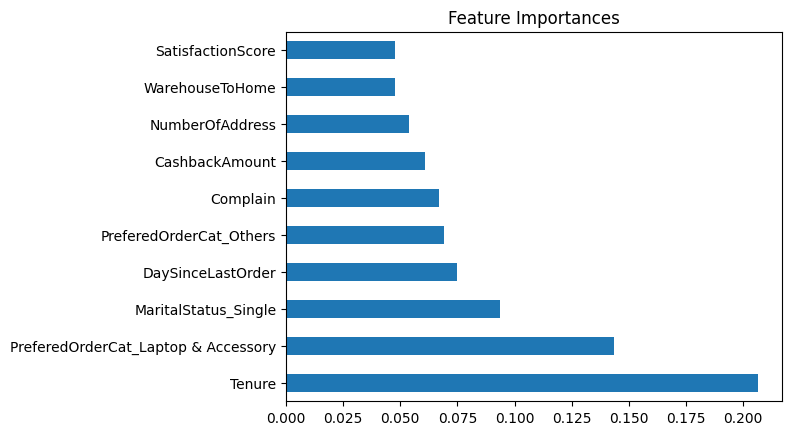

In [83]:
feature_final = misval_kolom + pipeline_model['preprocess'].transformers_[1][1].get_feature_names_out().tolist() + ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'CashbackAmount']

feat_imp = pd.Series(best_model['model'].feature_importances_, feature_final).sort_values(ascending = False).head(10)
feat_imp.plot(kind='barh', title='Feature Importances')
plt.show()

Berdasarkan plot diatas, dapat disimpulkan bahwa `Tenure` dan `PreferedOrderCat` merupakan feature yang berperan penting dalam model machine learning.

## Conclusion dan Recomendation

In [84]:
report_tuned = classification_report(y_test, y_pred_tuned)
print('Classification Report Tuned Model: \n', report_tuned)

Classification Report Tuned Model: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       547
           1       0.64      0.77      0.70       107

    accuracy                           0.89       654
   macro avg       0.80      0.84      0.82       654
weighted avg       0.90      0.89      0.90       654



### Conclusion

Berdasarkan hasil classification report dengan metode Machine Learning **XGBoost Classifier**, dapat disimpulkan bahwa model dapat mengetahui 92% customer yang tidak churn dan 77% customer yang churn berdasarkan recall. Dan berdasarkan nilai prediksi, model memiliki kemungkinan customer churn sebesar 64%, sehingga masih ada customer tidak churn dan diprediksi sebagai churn (False Positive Rate) sebesar 7%

Berdasarkan `sumber` Biaya yang dikeluarkan jika harus mendapatkan 1 customer berkisar antara 50 USD, sedangkan biaya yang digunakan untuk mempertahankan 1 customer berkisar antara 20 USD.

**A. Memberikan Promosi Tanpa Model**
- Total biaya: 3269 * 20 USD = 65,380 USD
- Total customer churn: 533 customer
- Total customer tidak churn: 2736 customer
- Biaya yang terbuang: 2736 * 20 USD = 54,720 USD

**B. Memberikan Promosi menggunakan Model**

- Total biaya: 533 * 20 USD = 10,660
- Total customer churn actual: 533 * 0.77 = 410 customer
- Total customer churn yang tidak actual: 94 + (0,07 * 2736) = 285 customer
- Total customer tidak churn actual: 2736 * 0.92 = 2517 customer
- Total customer tidak churn tidak actual: 2736 - 2517 = 219 customer
- Biaya yang sebenarnya terbuang: (219 * 50 USD) + (285 * 20 USD) = 16,650 USD
- Biaya yang dihemat dibandingkan tanpa model: 54,720 USD - 16,650 USD = 38,070 USD

Dengan penggunaan model, perusahaan dapat menghemat sebesar **16,650 USD**

### Recommendation

**Business**

1. Perusahaan dapat memberikan vocer gratis ongkos kirim pada customer yang berpotensi churn.
2. Perusahaan dapat membuat marketing campaign yang lebih segmented seperti kategori pesanan yang disukai, berapa lama langganan customer.
3. Mengembangkan fitur pada aplikasi e-commerce seperti permainan atau live dari toko yang disukai. Dan memberikan poin untuk setiap pembeliannya yang bisa digunakan kembali untuk belanja. 

**Model**

1. Menambahkan fitur lain terkait faktor churn, sehingga dapat dilihat faktor - faktor lain yang mempengaruhi customer churn.
2. Menghilangkan outlier, agar bisa dilihat apakah outlier mempengaruhi hasil secara signifikan atau tidak.
3. Melakukan uji pada model machine learning lain dan hypertuning kembali.

### Save Model

Save model with **pickle**, merupakan suatu library yang bisa digunakan untuk menyimpan model machine learning yang sudah dibuat.

In [85]:
import pickle

In [86]:
file_name = 'Model_Final.sav'
pickle.dump(best_model, open(file_name, 'wb'))